<a href="https://colab.research.google.com/github/jccrews256/ST-558-Repo/blob/main/Week_4_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let's Write Some Functions

Let's do some more lambda practice with the `sorted()` function!

In [3]:
import pandas as pd
nums = [4, 10, 22, 5, 12, 1]
ids = ["id" + str(x) for x in nums]
cost = [21, 32, 12, 0, 23, 43]
print(ids, cost)


['id4', 'id10', 'id22', 'id5', 'id12', 'id1'] [21, 32, 12, 0, 23, 43]


In [4]:
my_df = pd.DataFrame(cost, index = ids, columns = ["cost"])
my_df

,cost
id4,21
id10,32
id22,12
id5,0
id12,23
id1,43


In [5]:
# Can't simply sort by keys directly
sorted(my_df.index)

['id1', 'id10', 'id12', 'id22', 'id4', 'id5']

In [6]:
# What we really want is to extract this for each and sort
my_df.index[0][2:]

'4'

In [7]:
# Using a lambda function for key to get what we want
sorted(my_df.index, key = lambda x: int(x[2:]))

['id1', 'id4', 'id5', 'id10', 'id12', 'id22']

In [8]:
my_df.loc[sorted(my_df.index, key = lambda x: int(x[2:]))]

,cost
id1,43
id4,21
id5,0
id10,32
id12,23
id22,12


Now let's play around with the map functions using our find_means() function.

Starting with what we created in lecture.

In [9]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(3)

def find_means(*args, decimals = 4):
    """
    Assume that args will be a bunch of numpy arrays (1D) or pandas series
    """
    means = []
    for x in args: #iterate over the tuple values
        means.append(np.mean(x).round(decimals))
    return means

In [10]:
# Use map to generate several random samples of increasing size
data = map(rng.standard_normal, range(0,1001,10))

In [11]:
#Now pass to function to unpack
find_means(*data)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[np.float64(nan),
 np.float64(-0.1127),
 np.float64(0.1436),
 np.float64(-0.0849),
 np.float64(-0.1344),
 np.float64(0.1408),
 np.float64(0.163),
 np.float64(0.0532),
 np.float64(-0.0275),
 np.float64(0.0772),
 np.float64(0.1796),
 np.float64(0.0551),
 np.float64(-0.0607),
 np.float64(-0.0835),
 np.float64(0.0469),
 np.float64(0.0472),
 np.float64(0.1025),
 np.float64(0.0076),
 np.float64(0.1612),
 np.float64(-0.1219),
 np.float64(0.0143),
 np.float64(0.0611),
 np.float64(-0.0936),
 np.float64(-0.0128),
 np.float64(0.0313),
 np.float64(-0.0089),
 np.float64(-0.0363),
 np.float64(-0.0906),
 np.float64(0.0247),
 np.float64(-0.0412),
 np.float64(0.0146),
 np.float64(0.0107),
 np.float64(-0.0007),
 np.float64(0.0672),
 np.float64(-0.04),
 np.float64(0.0097),
 np.float64(-0.0383),
 np.float64(0.0196),
 np.float64(-0.0803),
 np.float64(0.0752),
 np.float64(-0.0321),
 np.float64(0.0587),
 np.float64(-0.0864),
 np.float64(0.005),
 np.float64(-0.0136),
 np.float64(0.0309),
 np.float64(-0.0275),

## Onto Some Plotting!

In [12]:
import matplotlib.pyplot as plt

In [13]:
data = map(rng.standard_normal, range(0,1001,10))
my_means = find_means(*data)
my_df = pd.DataFrame(zip(my_means, range(0,1001,10)), columns = ["means", "n"])
my_df.head()

,means,n
0,NaN,0
1,-0.2983,10
2,-0.2062,20
3,-0.2725,30
4,0.2560,40


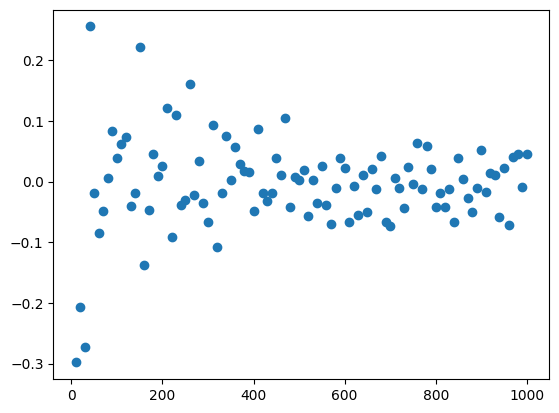

In [14]:
plt.scatter(my_df.n, my_df.means)

Let's turn all this into a function!

In [15]:
def plot_means(n = 50):
    data = map(rng.standard_normal, range(1,n+1))
    my_means = find_means(*data)
    my_df = pd.DataFrame(zip(my_means, range(1,n+1)), columns = ["means", "n"])
    plt.scatter(my_df.n, my_df.means)
    plt.axhline(y = 0, color = "r", linestyle = "-")

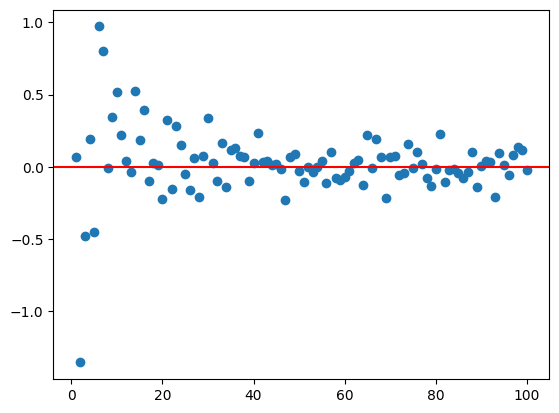

In [16]:
plot_means(100)

## Onto Plotting with `Pandas`

In [17]:
import pandas as pd
scores = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
scores.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [18]:
summaries = scores \
    .groupby("season") \
    .agg(max_AtotalYds = ("AtotalYds", "max"),
         min_AtotalYds = ("AtotalYds", "min"),
         mean_AtotalYds = ("AtotalYds", "mean"),
         median_AtotalYds = ("AtotalYds", "median"))

Let's make a line plot of these.

<Axes: xlabel='season'>

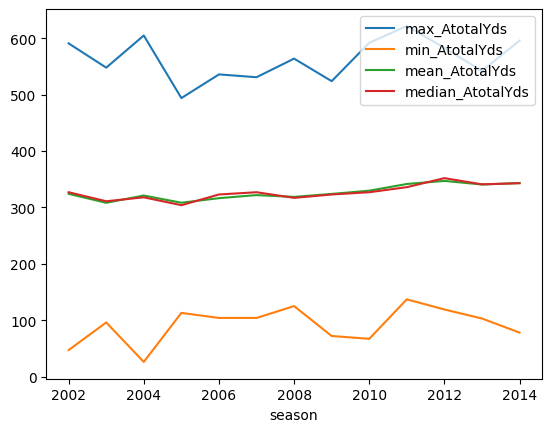

In [19]:
summaries.plot() #Easy-peasy

## Let's Handle Some Errors!

In [20]:
def find_means(*args, decimals = 4):
    """
    Assume that args will be a bunch of numpy arrays (1D) or pandas series
    """
    means = []
    for x in args: #iterate over the tuple values
        means.append(np.mean(x).round(decimals))
    return means

In [22]:
find_means(np.array([1,2,3,6,"hi"]))

TypeError: the resolved dtypes are not compatible with add.reduce. Resolved (dtype('<U21'), dtype('<U21'), dtype('<U42'))

In [23]:
def find_means(*args, decimals = 4):
    """
    Assume that args will be a bunch of numpy arrays (1D) or pandas series
    """
    means = []
    for x in args: #iterate over the tuple values
        try:
            means.append(np.mean(x).round(decimals))
        except TypeError:
            print("Ah, bummer. You provided at least one non-numeric element.")
            means.append(np.nan)
    return means

In [24]:
find_means([1,3,4,"food"])

Ah, bummer. You provided at least one non-numeric element.


[nan]

In [25]:
find_means([1,3,4])

[np.float64(2.6667)]

In [27]:
find_means([1,3,4],["dog"],1)

Ah, bummer. You provided at least one non-numeric element.


[np.float64(2.6667), nan, np.float64(1.0)]